# LDA and Probabilistic Topic Models

    Discovering Latent Themes in Text Data

## Objective

This notebook provides a systematic and practical treatment of probabilistic topic modeling, covering:

- Why topic modeling is needed

- Bag-of-Words and probabilistic assumptions

- Latent Dirichlet Allocation (LDA)

- Topic interpretation and coherence

- Business use cases and limitations

It answers:

    How can we uncover latent themes in large text corpora in an interpretable and statistically grounded way?

## Business Context – Why Topic Modeling?

Topic modeling is used when:

- Large volumes of unstructured text exist

- Manual labeling is infeasible

- Interpretability is required

- Discovery, not prediction, is the goal

Typical use cases:

- Customer complaint analysis

- Call center transcripts

- Regulatory filings

- News and market intelligence

- Support ticket categorization

## Imports and Datasets


**Example columns:**

- complaint_id

- text

- product

- channel

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("D:/GitHub/Data-Science-Techniques/datasets/Unsupervised/bank_complaints.csv")

df.head()

,complaint_id,text,product,channel
0,C00001,interest rate increased suddenly. I have conta...,Credit Card,Website
1,C00002,loan application was denied without explanatio...,Personal Loan,Mobile App
2,C00003,issue was escalated but no follow up. this has...,Mortgage,Mobile App
3,C00004,annual fee was applied without notice. I have ...,Credit Card,Email
4,C00005,customer service never responds. I expect a pr...,Mortgage,Website


# Text Preprocessing

Topic models require clean, normalized text.

## Basic Cleaning

In [13]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)   # keep alpha character while eliminating numeric and special character
    text = " ".join([w for w in text.split() if w not in stop_words]) # eliminate stopwords
    return text

df["clean_text"] = df["text"].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pantu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Bag-of-Words Representation

LDA operates on word counts, not embeddings.

### Count Vectorization

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_df=0.9,
    min_df=10,
    ngram_range=(1, 2)
)

X_counts = vectorizer.fit_transform(df["clean_text"])


# Probabilistic Model Intuition (LDA)

LDA assumes:

- Documents are mixtures of topics

- Topics are distributions over words

- Dirichlet priors control sparsity

✔ Interpretable
✔ Statistically grounded
✔ Order-invariant

## Fit Latent Dirichlet Allocation
### LDA Model

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=6,
    max_iter=20,
    learning_method="batch",
    random_state=2010
)

lda.fit(X_counts)


LatentDirichletAllocation(max_iter=20, n_components=6, random_state=2010)

## Topic Interpretation
### Top Words per Topic

In [16]:
def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx}")
        print(
            ", ".join(
                feature_names[i]
                for i in topic.argsort()[:-n_top_words - 1:-1]
            )
        )

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names)



Topic 0
account, website shows, website, shows, shows error, error, error login, login, frustrating, unacceptable

Topic 1
prompt resolution, expect prompt, expect, resolution, prompt, long, fee, unacceptable, seems incorrect, seems

Topic 2
charges still, still, still pending, fraudulent charges, pending, fraudulent, funds, inaccessible closure, funds inaccessible, inaccessible

Topic 3
issue, resolve, please, issue immediately, immediately, resolve issue, please resolve, account, without, frustrating

Topic 4
support, times, support multiple, multiple, contacted support, contacted, multiple times, keeps, charges, support team

Topic 5
online, loan, unacceptable, banking system, system, banking, online banking, frustrating, keeps changing, status keeps


## Example Topic Interpretation


| Topic | Interpretation          |
| ----- | ----------------------- |
| 0     | Credit card fees        |
| 1     | Loan approval issues    |
| 2     | Online banking outages  |
| 3     | Fraud disputes          |
| 4     | Customer service delays |
| 5     | Account closure         |


✔ Topics should be coherent and actionable

## Document–Topic Distribution
### Topic Probabilities

In [18]:
doc_topic_dist = lda.transform(X_counts)

doc_topic_dist[:5]


array([[0.94789018, 0.01041667, 0.01041866, 0.01041667, 0.0104399 ,
        0.01041792],
       [0.01044414, 0.09793455, 0.54542442, 0.01042879, 0.01043558,
        0.32533252],
       [0.0208623 , 0.02088668, 0.02090943, 0.89558195, 0.02089254,
        0.0208671 ],
       [0.95093057, 0.00981415, 0.0098089 , 0.0098069 , 0.00982436,
        0.00981512],
       [0.01282052, 0.01287319, 0.55127322, 0.01282052, 0.01282052,
        0.39739202]])

Each document is a probability vector over topics.

## Dominant Topic per Document
### Assign Topic

In [19]:
df["dominant_topic"] = doc_topic_dist.argmax(axis=1)
df[["complaint_id", "dominant_topic"]].head()


,complaint_id,dominant_topic
0,C00001,0
1,C00002,2
2,C00003,3
3,C00004,0
4,C00005,2


## Topic Prevalence Analysis
##  Topic Frequency

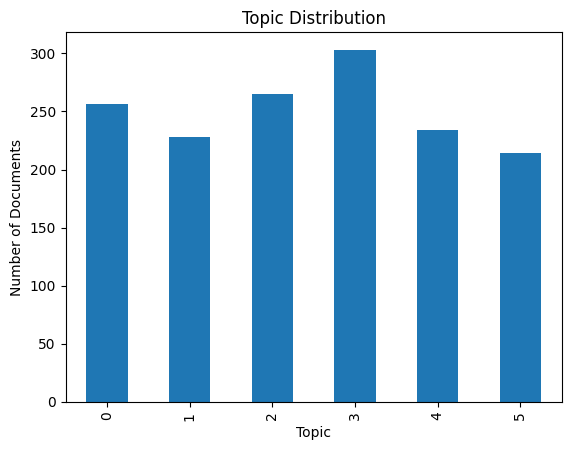

In [20]:
topic_counts = df["dominant_topic"].value_counts().sort_index()

topic_counts.plot(kind="bar")
plt.title("Topic Distribution")
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.show()


## Step 9 – Model Selection (Number of Topics)

There is no single correct K.

Heuristics:

- Topic coherence

- Business interpretability

- Stability across runs

## Step 10 – Limitations of LDA

- `[neg] -` Bag-of-words assumption
- `[neg] -` Order ignored
- `[neg] -` Sensitive to preprocessing
- `[neg] -` Struggles with short texts

## Alternative Probabilistic Models


| Model | Use Case                 |
| ----- | ------------------------ |
| LDA   | General-purpose          |
| NMF   | Deterministic topics     |
| HDP   | Unknown number of topics |
| CTM   | Topic correlation        |




## Common Mistakes (Avoided)

- `[no] -` Treating topics as labels
- `[no] -` Over-optimizing topic count
- `[no] -` Ignoring preprocessing impact
- `[no] -` Using embeddings with LDA
- `[no] -` Expecting prediction accuracy

## Summary Table

| Component      | Recommendation       |
| -------------- | -------------------- |
| Representation | Bag-of-Words         |
| Model          | LDA                  |
| Topics         | 5–15 typical         |
| Validation     | Coherence + business |
| Use Case       | Discovery            |


## Key Takeaways

- LDA is an interpretable probabilistic model

- Topics are distributions, not classes

- Preprocessing quality dominates results

- Validation is qualitative + quantitative

- Best for discovery, not prediction

## Next Notebook
[05_Unsupervised_Learning/]()

└── [03_topic_modeling/]()

- └── [02_embedding_based_topic_models.ipynb](02_embedding_based_topic_models.ipynb)

<br><br><br><br><br>



# Complete: [Data Science Techniques](https://github.com/lei-soares/Data-Science-Techniques)

- [00_Data_Generation_and_Simulation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/00_Data_Generation_and_Simulation)


- [01_Exploratory_Data_Analysis_(EDA)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/01_Exploratory_Data_Analysis_(EDA))


- [02_Data_Preprocessing](https://github.com/lei-soares/Data-Science-Techniques/tree/main/02_Data_Preprocessing)


- [03_Feature_Engineering](https://github.com/lei-soares/Data-Science-Techniques/tree/main/03_Feature_Engineering)


- [04_Supervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/04_Supervised_Learning)

    - [Regression Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/01_regression_models)
    
    - [Classification Models](https://github.com/lei-soares/Data-Science-Techniques/tree/49de369e0600a513b54445e8cb4196b26ce71853/04_Supervised_Learning/02_classification_models)


- [05_Unsupervised_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/05_Unsupervised_Learning)


- [06_Model_Evaluation_and_Validation](https://github.com/lei-soares/Data-Science-Techniques/tree/main/06_Model_Evaluation_and_Validation)


- [07_Model_Tuning_and_Optimization](https://github.com/lei-soares/Data-Science-Techniques/tree/main/07_Model_Tuning_and_Optimization)


- [08_Interpretability_and_Explainability](https://github.com/lei-soares/Data-Science-Techniques/tree/main/08_Interpretability_and_Explainability)


- [09_Pipelines_and_Workflows](https://github.com/lei-soares/Data-Science-Techniques/tree/main/09_Pipelines_and_Workflows)


- [10_Natural_Language_Processing_(NLP)](https://github.com/lei-soares/Data-Science-Techniques/tree/main/10_Natural_Language_Processing_(NLP))


- [11_Time_Series](https://github.com/lei-soares/Data-Science-Techniques/tree/main/11_Time_Series)


- [12_Anomaly_and_Fraud_Detection](https://github.com/lei-soares/Data-Science-Techniques/tree/main/12_Anomaly_and_Fraud_Detection)


- [13_Imbalanced_Learning](https://github.com/lei-soares/Data-Science-Techniques/tree/main/13_Imbalanced_Learning)


- [14_Deployment_and_Production_Concepts](https://github.com/lei-soares/Data-Science-Techniques/tree/main/14_Deployment_and_Production_Concepts)


- [15_Business_and_Experimental_Design](https://github.com/lei-soares/Data-Science-Techniques/tree/main/15_Business_and_Experimental_Design)




<br><br><br><br><br>

[Panfugo Dados](www.pantufodados.com)


[Pantufo Dados - YouTube Channel](https://www.youtube.com/@pantufodados)